# Regression and stability phenomenon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import lagrange
from IPython.display import display
import ipywidgets as widgets
%matplotlib notebook
# sns.set()

## Runge phenomenon

In [2]:
def make_function(f, /, xmin=-1, xmax=1, n_points=1000):
    x = np.linspace(xmin, xmax, n_points)
    return x, f(x)

In [3]:
def f(x):
    return 1/(1+25*x**2)

In [4]:
slider = widgets.IntSlider(
    min=3,
    max=20,
    step=1,
    description='Slider:',
    value=3
)

<IPython.core.display.Javascript object>


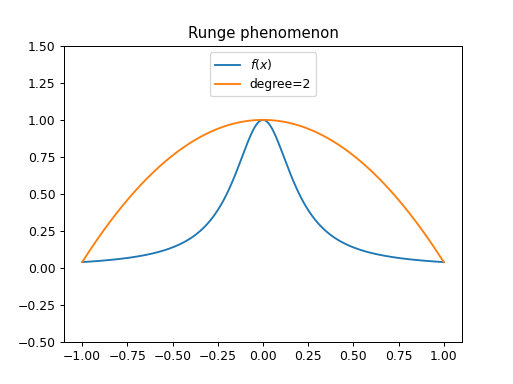

interactive(children=(IntSlider(value=3, description='n_points:', layout=Layout(visibility='hidden'), max=31, …

In [5]:
def get_points(n_points, f):
    x = np.linspace(-1, 1, n_points)
    y = f(x)
    poly = lagrange(x, y) 
    return x, y, poly

n_slider = widgets.IntSlider(
    value=3,
    min=3,
    max=31,
    step=1,
    description='n_points:',
)
n_slider.layout.visibility = "hidden"
play = widgets.Play(
    value=3,
    min=3,
    max=31,
    step=1,
    interval=200,
    description="Press play",
    disabled=False
)


fig, ax = plt.subplots(1, 1)
plt.title("Runge phenomenon")
x_true, y_true = make_function(f)
ax.plot(x_true, y_true, label=r"$f(x)$")
regress, = ax.plot([], [], label=r"interpolation")

@widgets.interact(n_points=n_slider)
def plot(n_points):
    ax.set_ylim([-.5, 1.5])
    x, _, poly = get_points(n_points, f)
    regress.set_data(x_true, poly(x_true))
    regress.set_label(f"degree={n_points - 1}")
    plt.legend(loc="upper center")
    
slider = n_slider
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

## Gibbs phenomenon

Based from [scipython website].(https://scipython.com/book/chapter-6-numpy/additional-problems/the-gibbs-phenomenon/)

Wave that oscillates squarely between 1 and -1 has Fourier series expansion $$f(x)=\frac{4}{\pi}\sum_{i=1}^n \sin(n\pi x).$$

In [6]:
def make_function_bis(xmin=-2, xmax=2, n_points=1000):
    x = np.linspace(xmin, xmax, n_points)
    return x, 1 - 2 * (x.astype(int) % 2)

<IPython.core.display.Javascript object>


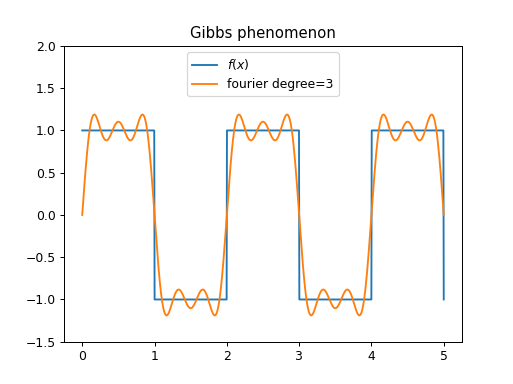

interactive(children=(IntSlider(value=2, description='N:', layout=Layout(visibility='hidden'), max=50, min=2),…

In [7]:
n_slider = widgets.IntSlider(
    value=2,
    min=2,
    max=50,
    step=1,
    description='N:',
)
n_slider.layout.visibility = "hidden"
play = widgets.Play(
    value=3,
    min=3,
    max=50,
    step=1,
    interval=100,
    description="Press play",
    disabled=False
)

fig, ax = plt.subplots(1, 1)
plt.title("Gibbs phenomenon")
x_true, y_true = make_function_bis(0, 5)
ax.plot(x_true, y_true, label=r"$f(x)$")
regress, = ax.plot([], [], label=r"interpolation")

@widgets.interact(N=n_slider)
def plot(N):
    ax.set_ylim([-1.5, 2.])
    fsq = np.zeros_like(x_true)
    for i in range(N):
        n = 2*i + 1
        fsq += np.sin(n * np.pi * x_true) / n
    fsq *= 4 / np.pi
    regress.set_data(x_true, fsq)
    regress.set_label(f"fourier degree={N}")
    plt.legend(loc="upper center")

slider = n_slider
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])